# [2.X코드반영] Lab 11-0-2: CNN Basic: Pooling

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


## Max pooling

In [14]:
image = tf.constant([[[[4],[3]],
                     [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='VALID')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


## SAME: Zero paddings


In [15]:
image = tf.constant([[[[4],[3]],
                     [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [16]:
mnist = keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [18]:
train_images = train_images.astype(np.float32)/255.
test_images = test_images.astype(np.float32)/255.

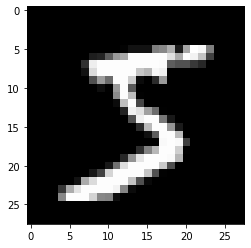

In [19]:
img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

(1, 14, 14, 5)


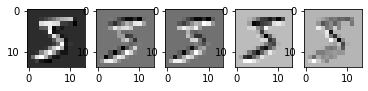

In [20]:
img = img.reshape(-1,28,28,1)
img = tf.convert_to_tensor(img)
weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2,2), padding='SAME', kernel_initializer=weight_init)(img)

print(conv2d.shape)

feature_maps = np.swapaxes(conv2d,0,3)
for i, feature_map in enumerate(feature_maps):
  plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

(1, 7, 7, 5)


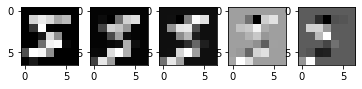

In [21]:
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d)
print(pool.shape)

feature_maps = np.swapaxes(pool,0,3)

for i, feature_map in enumerate(feature_maps):
  plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7,7), cmap='gray')
plt.show()